<a href="https://colab.research.google.com/github/riyagpt0251/Handwritten-digit-recognition/blob/main/MNIST_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


load the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


data preprocessing

In [3]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Reshape the data

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Convert code to one hot encoding

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Build the CNN model

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile the model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train the model

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.8549 - loss: 0.4561 - val_accuracy: 0.9823 - val_loss: 0.0597
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9757 - loss: 0.0810 - val_accuracy: 0.9877 - val_loss: 0.0415
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9810 - loss: 0.0606 - val_accuracy: 0.9900 - val_loss: 0.0364
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.9858 - loss: 0.0476 - val_accuracy: 0.9908 - val_loss: 0.0318
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9886 - loss: 0.0367 - val_accuracy: 0.9912 - val_loss: 0.0350
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9907 - loss: 0.0313 - val_accuracy: 0.9898 - val_loss: 0.0392
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9904 - loss: 0.0281 - val_accuracy: 0.9914 - val_loss: 0.0350
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9918 -

evaluate the model

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9907 - loss: 0.0308
Test Accuracy: 99.30%


Visualize training performance

In [10]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

plot training

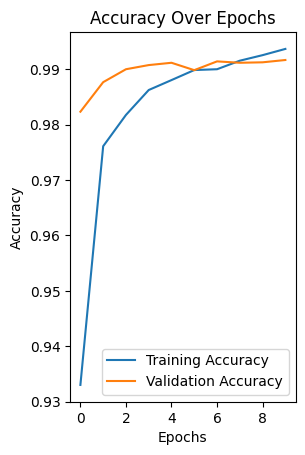

In [11]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

validation loss

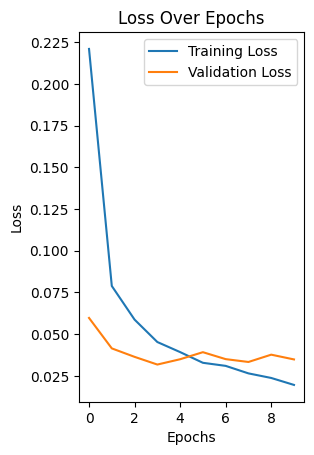

In [12]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


test prediction

In [13]:
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:5], axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


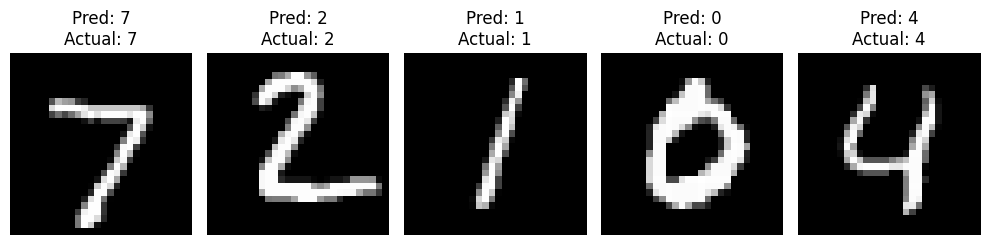

In [14]:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {actual_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

save the model

In [15]:
model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'")


Model saved as 'mnist_cnn_model.h5'
